In [1]:
import pandas as pd
import numpy as np

experiments = ['fixed_1', 'fixed_2', 'fixed_3', 'fixed_4']
seeds = [f's{i}' for i in range(1, 11)]
specialists_mean = {}
specialists = {}

for experiment in experiments:
    specialist_data = f'../../datalake/data_{experiment}/data/xdpole/main_manager/main_stats'
    specialist_mean = []
    specialist_score = []
    for seed in seeds:
        df = pd.read_csv(f'{specialist_data}/{seed}_run.csv')
        specialist_mean.append(
            df.specialist_score.mean()
        )
        specialist_score.append(
            list(df.specialist_score)
        )
    specialists[experiment] = specialist_score
    specialists_mean[experiment] = specialist_mean

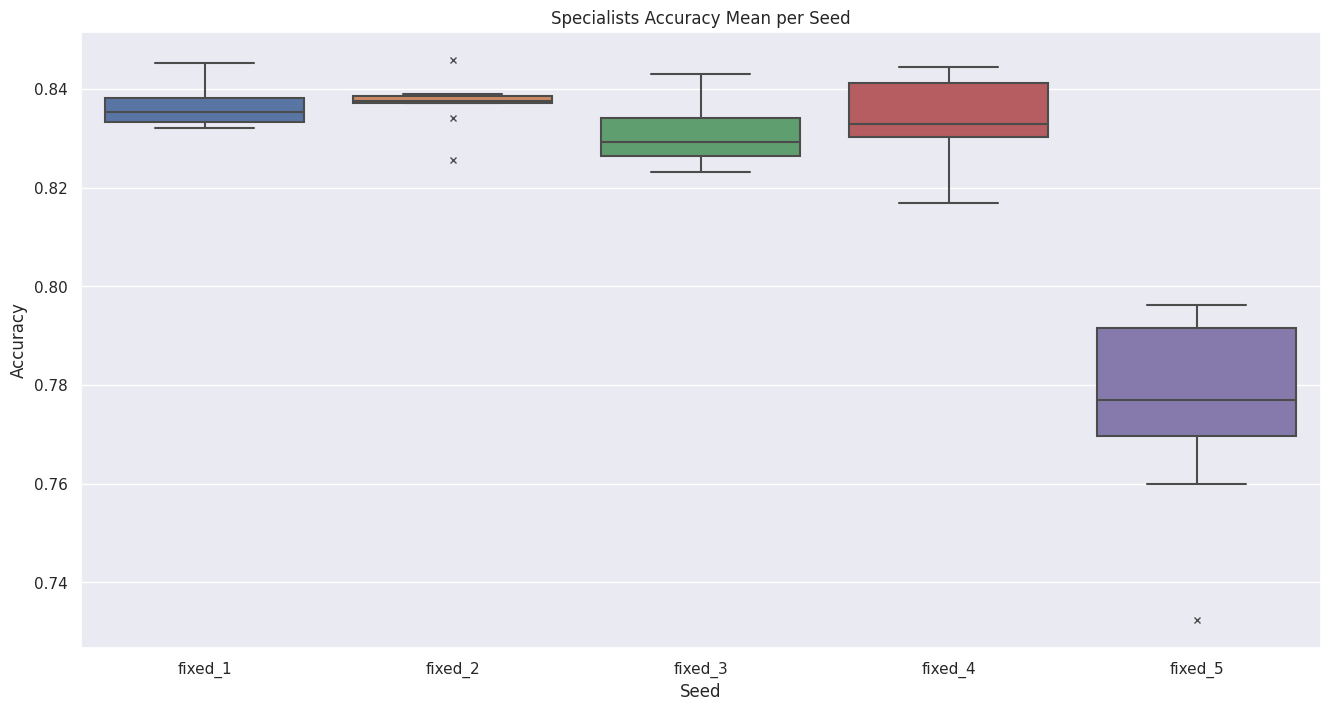

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

df = pd.DataFrame(specialists_mean)
sns.boxplot(df, flierprops={"marker": "x"})
plt.title(f"Specialists Accuracy Mean per Seed")
plt.ylabel("Accuracy")
plt.xlabel("Seed")
plt.show()

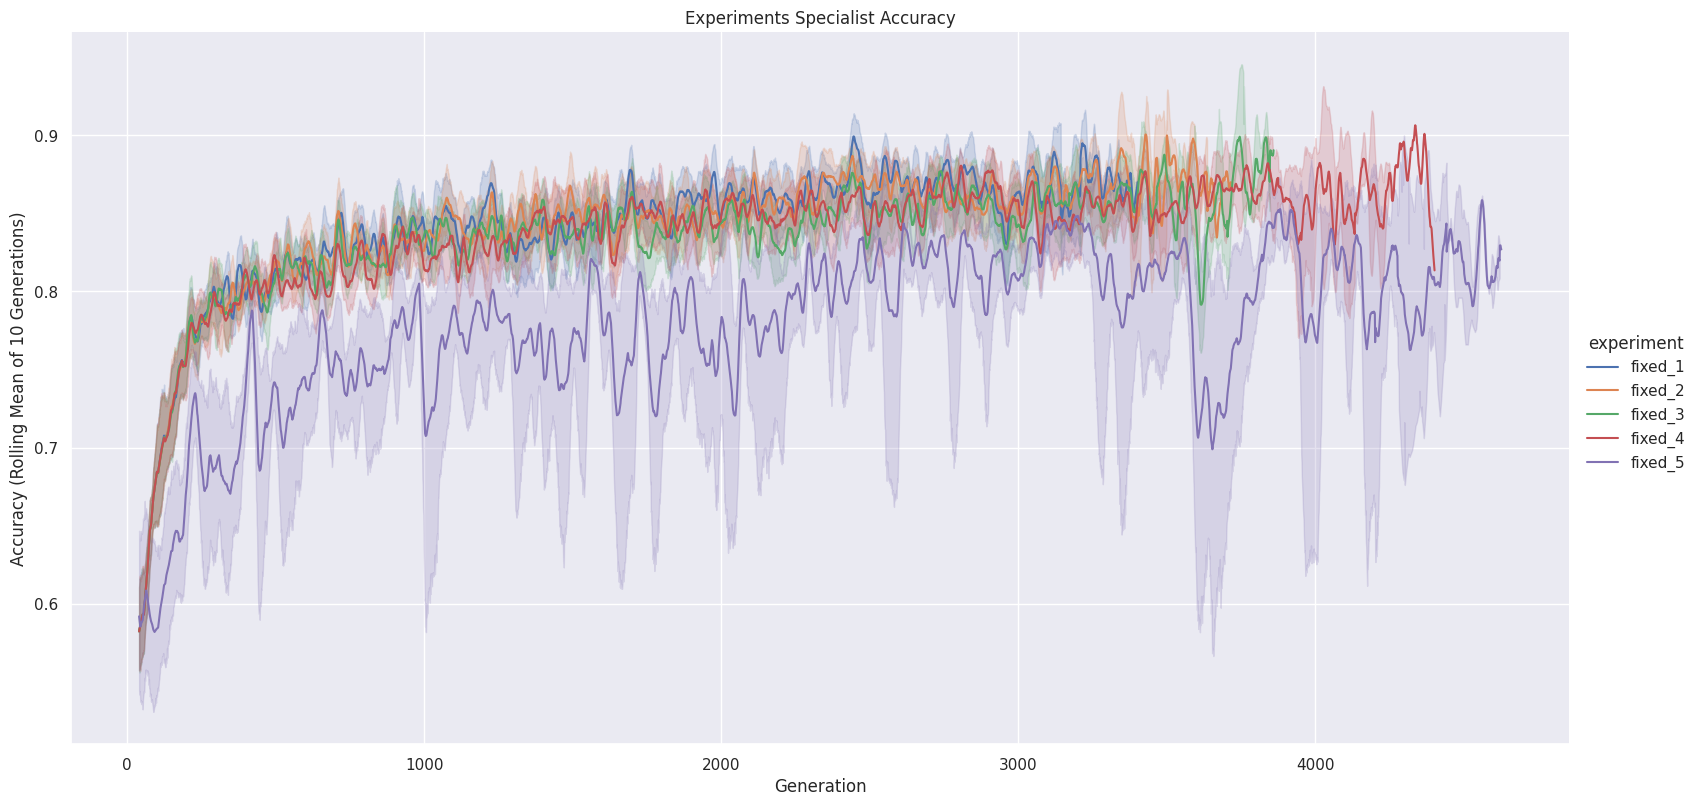

In [3]:
mean_stats = pd.DataFrame()

for experiment in experiments:
    experiment_df = pd.DataFrame(specialists[experiment])
    experiment_df = experiment_df.T
    experiment_df.columns = seeds
    
    seeds_df = pd.DataFrame()
    for seed in seeds:
        rolling_mean = experiment_df[seed].rolling(20).mean()

        seed_df = pd.DataFrame({'gen': [i for i in range(len(experiment_df[seed]))], 'accuracy': rolling_mean})
        seed_df['seed'] = seed

        seeds_df = pd.concat([seeds_df, seed_df], ignore_index=True) if not seeds_df.empty else seed_df

    seeds_df['experiment'] = experiment
    mean_stats = pd.concat([mean_stats, seeds_df], ignore_index=True) if not mean_stats.empty else seeds_df

sns.relplot(mean_stats, x='gen', y='accuracy', hue='experiment', kind='line', estimator='mean', height=8, aspect=2)
plt.title("Experiments Specialist Accuracy")
plt.ylabel("Accuracy (Rolling Mean of 10 Generations)")
plt.xlabel("Generation")
plt.show()

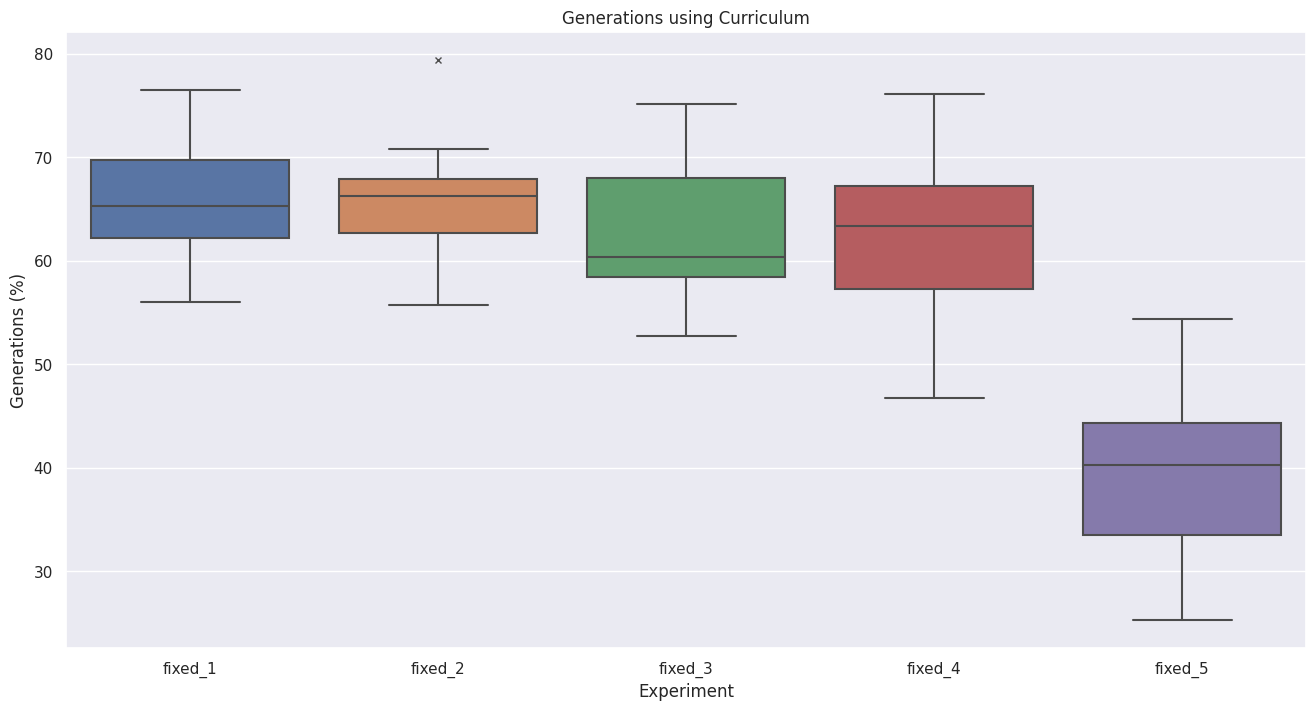

In [4]:
qualified = {}

for experiment in experiments:
    experiment_df = pd.DataFrame(specialists[experiment])
    experiment_df = experiment_df.T
    experiment_df.columns = seeds

    experiment_cl = []
    for seed in seeds:
        qualified_gens = experiment_df.query(f'{seed} >= 0.8')
        experiment_cl.append(len(qualified_gens[seed])/len(experiment_df[seed]) * 100)
    
    qualified[experiment] = experiment_cl

df = pd.DataFrame(qualified)
sns.boxplot(df, flierprops={"marker": "x"})
plt.title("Generations using Curriculum")
plt.ylabel("Generations (%)")
plt.xlabel("Experiment")
plt.show()